<a href="https://colab.research.google.com/github/Cblarocca/QuarentenaDatos/blob/master/Sinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VARIÁVEIS

In [2]:
#SINAIS INICIAIS ---------------------------------------------------------------

#Inicio_1_500
#Inicio_2_500
#Inicio_3_500

#Meio_1_500
#Meio_2_500
#Meio_3_500

#Final_1_500
#Final_2_500
#Final_3_500

#target

#SINAIS MÉDIOS -----------------------------------------------------------------

#sinais_mean_500["1_Inicio"]
#sinais_mean_500["2_Inicio"]
#sinais_mean_500["3_Inicio"]

#sinais_mean_500["1_Meio"]
#sinais_mean_500["2_Meio"]
#sinais_mean_500["3_Meio"]

#sinais_mean_500["1_Final"]
#sinais_mean_500["2_Final"]
#sinais_mean_500["3_Final"]

# SINAIS NORMALIZADOS ENTRE ZERO E 1--------------------------------------------

#sinais_mean_500_norm 

# SINAIS COM PONTO MINIMO IGUAL ------------------------------------------------

#sinais_mean_500_norm2["1_Inicio"] 
#sinais_mean_500_norm2["2_Inicio"]
#sinais_mean_500_norm2["3_Inicio"]

#sinais_mean_500_norm2["1_Meio"]
#sinais_mean_500_norm2["2_Meio"]
#sinais_mean_500_norm2["3_Meio"]

#sinais_mean_500_norm2["1_Final"]
#sinais_mean_500_norm2["2_Final"]
#sinais_mean_500_norm2["3_Final"]

# DATAFRAME SINAI SEM PROCESSAMENTO --------------------------------------------

#Inicio_500
#Meio_500
#Final_500

#dataset_norm             DATASET PARA REDE NEURAL

# DATAFRAME SINAIS EXPONENCIAIS ------------------------------------------------
#sinais_mean_500_exp      MÉDIA
#dataset_exp              DATASET EXPONENCIAL PÁRA REDE NEURAL

# DATAFRAME SINAIS FFT ---------------------------------------------------------
#xf_500                   MÉDIA
#xf_500_dataset           DATASET FFT REDE NEURAL

# PARAMETROS INICIAIS - CÓDIGO

In [3]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pylab as pl
import seaborn as sn

import scipy.fftpack

# Load libraries
#from pandas.plotting import scatter_matrix
#from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import svm, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
pip install fdasrsf

     |████████████████████████████████| 4.0MB 20.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for fdasrsf: filename=fdasrsf-2.2.10-cp37-cp37m-linux_x86_64.whl size=1495551 sha256=bca09c41921f145f30d616793662773756b1111bbfd430d0af843bb8c2585ea2
  Stored in directory: /root/.cache/pip/wheels/0c/d9/d0/56dae67ca0e6a7f7e50105af8ba9dd4051d8ef30081eeafb13
Successfully built fdasrsf


In [5]:
from google.colab import files

# IMPORTANDO ARQUIVOS DO COMPUTADOR
#uploaded = files.upload() #codigo para importar arquivos do computador

# IMPORTANDO ARQUIVOS DO GOOGLE DRIVE

Final_1_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Final 1 - SINAIS.xls", header=None)
Inicio_1_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Inicio 1 - SINAIS.xls", header=None)
Meio_1_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Meio 1 - SINAIS.xls", header=None)
Final_2_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Final 2 - SINAIS.xls", header=None)
Inicio_2_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Inicio 2 - SINAIS.xls", header=None)
Meio_2_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Meio 2 - SINAIS.xls", header=None)
Final_3_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Final 3 - SINAIS.xls", header=None)
Inicio_3_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Inicio 3 - SINAIS.xls", header=None)
Meio_3_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - Meio 3 - SINAIS.xls", header=None)
target = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/SINAIS_500Hz_SEGUNDA_AMOSTRAGEM/500hz - TARGET.xls", header=None)

#SINAIS ANTIGOS
#Final_1_100 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (1) Final - SINAIS.xls", header=None)
#Inicio_1_100 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (1) Inicio - SINAIS.xls", header=None)
#Meio_1_100 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (1) Meio - SINAIS.xls", header=None)
#Final_2_100 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (2) Final - SINAIS.xls", header=None)
#Inicio_2_100 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (2) Inicio - SINAIS.xls", header=None)
#Meio_2_100 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (2) Meio - SINAIS.xls", header=None)
#Final_3_100_2 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (3) Final - SINAIS.xls", header=None)
#Inicio_3_100_2 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (3) Inicio - SINAIS.xls", header=None)
#Meio_3_100_2 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/100hz - (3) Meio - SINAIS.xls", header=None)
#Final_1_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (1) Final - SINAIS.xls", header=None)
#Inicio_1_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (1) Inicio - SINAIS.xls", header=None)
#Meio_1_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (1) Meio - SINAIS.xls", header=None)
#Final_2_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (2) Final - SINAIS.xls", header=None)
#Inicio_2_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (2) Inicio - SINAIS.xls", header=None)
#Meio_2_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (2) Meio - SINAIS.xls", header=None)
#Final_3_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (3) Final - SINAIS.xls", header=None)
#Inicio_3_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (3) Inicio - SINAIS.xls", header=None)
#Meio_3_500 = pd.read_excel("/content/drive/MyDrive/PESQUISA/SINAIS_CONCATENADOS/500hz - (3) Meio - SINAIS.xls", header=None)

In [6]:
Inicio_1_500.drop(Inicio_1_500.iloc[:, 51:101], axis=1, inplace=True)

Meio_1_500.drop(Meio_1_500.iloc[:, 51:99], axis=1, inplace=True)

Final_1_500.drop(Final_1_500.iloc[:, 51:104], axis=1, inplace=True)

In [7]:
Final_1_500

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,-0.0400,-0.0368,-0.0384,-0.0368,-0.0368,-0.0424,-0.0424,-0.0384,-0.0392,-0.0384,-0.0360,-0.0376,-0.0368,-0.0384,-0.0376,-0.0400,-0.0408,-0.0424,-0.0376,-0.0352,-0.0376,-0.0368,-0.0384,-0.0408,-0.0416,-0.0368,-0.0392,-0.0400,-0.0376,-0.0368,-0.0360,-0.0360,-0.0368,-0.0360,-0.0400,-0.0400,-0.0392,-0.0384,-0.0376,-0.0400,-0.0392,-0.0400,-0.0376,-0.0376,-0.0384,-0.0376,-0.0368,-0.0376,-0.0368,-0.0400,-0.0424
1,-0.0408,-0.0368,-0.0400,-0.0376,-0.0360,-0.0424,-0.0416,-0.0384,-0.0392,-0.0392,-0.0368,-0.0368,-0.0368,-0.0376,-0.0384,-0.0408,-0.0400,-0.0432,-0.0384,-0.0368,-0.0368,-0.0368,-0.0384,-0.0408,-0.0416,-0.0368,-0.0376,-0.0392,-0.0368,-0.0368,-0.0368,-0.0368,-0.0360,-0.0368,-0.0400,-0.0400,-0.0384,-0.0384,-0.0392,-0.0408,-0.0392,-0.0384,-0.0368,-0.0368,-0.0384,-0.0368,-0.0368,-0.0376,-0.0368,-0.0400,-0.0416
2,-0.0392,-0.0376,-0.0384,-0.0376,-0.0376,-0.0424,-0.0424,-0.0376,-0.0400,-0.0392,-0.0368,-0.0368,-0.0368,-0.0376,-0.0384,-0.0400,-0.0408,-0.0432,-0.0384,-0.0368,-0.0368,-0.0368,-0.0376,-0.0408,-0.0416,-0.0360,-0.0384,-0.0392,-0.0376,-0.0360,-0.0360,-0.0360,-0.0360,-0.0352,-0.0392,-0.0392,-0.0392,-0.0384,-0.0384,-0.0408,-0.0392,-0.0384,-0.0368,-0.0368,-0.0384,-0.0376,-0.0376,-0.0376,-0.0368,-0.0408,-0.0416
3,-0.0400,-0.0360,-0.0384,-0.0368,-0.0360,-0.0424,-0.0424,-0.0384,-0.0392,-0.0392,-0.0368,-0.0376,-0.0384,-0.0376,-0.0376,-0.0400,-0.0408,-0.0432,-0.0376,-0.0368,-0.0368,-0.0376,-0.0376,-0.0416,-0.0416,-0.0368,-0.0384,-0.0392,-0.0376,-0.0368,-0.0368,-0.0368,-0.0360,-0.0360,-0.0400,-0.0400,-0.0384,-0.0384,-0.0384,-0.0400,-0.0392,-0.0376,-0.0384,-0.0376,-0.0392,-0.0368,-0.0368,-0.0368,-0.0368,-0.0408,-0.0416
4,-0.0400,-0.0376,-0.0392,-0.0368,-0.0368,-0.0424,-0.0424,-0.0384,-0.0392,-0.0384,-0.0368,-0.0368,-0.0368,-0.0376,-0.0376,-0.0400,-0.0408,-0.0432,-0.0376,-0.0368,-0.0368,-0.0384,-0.0376,-0.0408,-0.0416,-0.0368,-0.0376,-0.0400,-0.0368,-0.0368,-0.0368,-0.0360,-0.0360,-0.0360,-0.0392,-0.0392,-0.0384,-0.0384,-0.0384,-0.0408,-0.0384,-0.0376,-0.0368,-0.0376,-0.0384,-0.0368,-0.0384,-0.0376,-0.0368,-0.0408,-0.0416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.0408,-0.0368,-0.0400,-0.0368,-0.0360,-0.0424,-0.0424,-0.0376,-0.0384,-0.0392,-0.0368,-0.0376,-0.0368,-0.0376,-0.0368,-0.0400,-0.0400,-0.0424,-0.0376,-0.0360,-0.0368,-0.0368,-0.0376,-0.0408,-0.0416,-0.0376,-0.0384,-0.0392,-0.0376,-0.0360,-0.0376,-0.0360,-0.0360,-0.0360,-0.0400,-0.0400,-0.0392,-0.0376,-0.0384,-0.0408,-0.0384,-0.0384,-0.0368,-0.0376,-0.0392,-0.0368,-0.0368,-0.0368,-0.0376,-0.0408,-0.0416
2496,-0.0400,-0.0376,-0.0392,-0.0368,-0.0368,-0.0424,-0.0424,-0.0384,-0.0392,-0.0392,-0.0360,-0.0376,-0.0376,-0.0376,-0.0384,-0.0400,-0.0400,-0.0432,-0.0384,-0.0376,-0.0368,-0.0368,-0.0376,-0.0408,-0.0408,-0.0368,-0.0384,-0.0400,-0.0376,-0.0376,-0.0368,-0.0360,-0.0368,-0.0360,-0.0400,-0.0392,-0.0392,-0.0384,-0.0384,-0.0408,-0.0392,-0.0384,-0.0368,-0.0384,-0.0384,-0.0368,-0.0368,-0.0376,-0.0368,-0.0400,-0.0416
2497,-0.0400,-0.0368,-0.0392,-0.0368,-0.0368,-0.0424,-0.0424,-0.0376,-0.0392,-0.0392,-0.0376,-0.0376,-0.0368,-0.0384,-0.0384,-0.0400,-0.0400,-0.0432,-0.0376,-0.0360,-0.0368,-0.0368,-0.0376,-0.0416,-0.0416,-0.0360,-0.0376,-0.0392,-0.0368,-0.0360,-0.0368,-0.0360,-0.0360,-0.0360,-0.0400,-0.0400,-0.0384,-0.0392,-0.0376,-0.0408,-0.0392,-0.0384,-0.0376,-0.0376,-0.0392,-0.0368,-0.0368,-0.0376,-0.0368,-0.0408,-0.0416
2498,-0.0400,-0.0360,-0.0400,-0.0368,-0.0368,-0.0432,-0.0424,-0.0384,-0.0392,-0.0392,-0.0368,-0.0376,-0.0376,-0.0384,-0.0384,-0.0400,-0.0408,-0.0432,-0.0384,-0.0368,-0.0360,-0.0376,-0.0384,-0.0408,-0.0416,-0.0368,-0.0384,-0.0392,-0.0376,-0.0368,-0.0368,-0.0368,-0.0368,-0.0360,-0.0400,-0.0400,-0.0392,-0.0384,-0.0384,-0.0408,-0.0392,-0.0384,-0.0368,-0.0376,-0

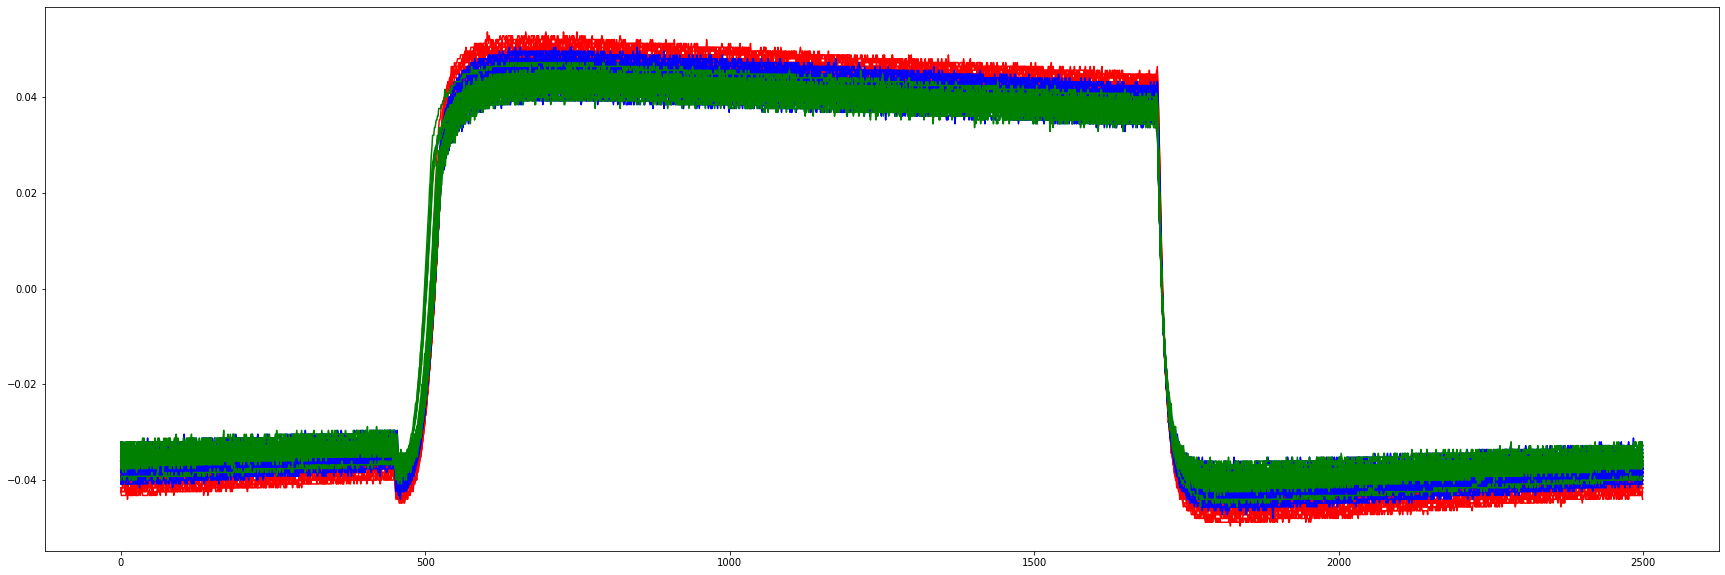

In [8]:
# VISUALIZANDO OS 36 SINAIS DA CONDIÇÃO E CHAPA ESCOLHIDAS, PARA CONFIRMAÇÃO:
#Meio_2_100 = Meio_2_100.reset_index(drop=True)
#Meio_3_100.plot(figsize=(35, 13))
#Meio_2_100.plot()
#plt.xlim(575, 1000)

plt.figure(figsize=(30,10))
plt.plot(Final_1_500,'r')
plt.plot(Meio_1_500,'b')
plt.plot(Inicio_1_500,'g')
plt.show()

# CORRELAÇÃO

In [9]:
# PARA A CORRELAÇÃO, VAMOS FAZER UMA MÉDIA DE CADA SINAL PARA UMA AMOSTRA

sinais_mean_500 = pd.DataFrame()

sinais_mean_500["1_Inicio"] = pd.Series(Inicio_1_500.sum(axis=1)/51)
sinais_mean_500["2_Inicio"] = pd.Series(Inicio_2_500.sum(axis=1)/51)
sinais_mean_500["3_Inicio"] = pd.Series(Inicio_3_500.sum(axis=1)/51)

sinais_mean_500["1_Meio"] = pd.Series(Meio_1_500.sum(axis=1)/51) 
sinais_mean_500["2_Meio"] = pd.Series(Meio_2_500.sum(axis=1)/51)
sinais_mean_500["3_Meio"] = pd.Series(Meio_3_500.sum(axis=1)/51)

sinais_mean_500["1_Final"] = pd.Series(Final_1_500.sum(axis=1)/51)
sinais_mean_500["2_Final"] = pd.Series(Final_2_500.sum(axis=1)/51)
sinais_mean_500["3_Final"] = pd.Series(Final_3_500.sum(axis=1)/51)

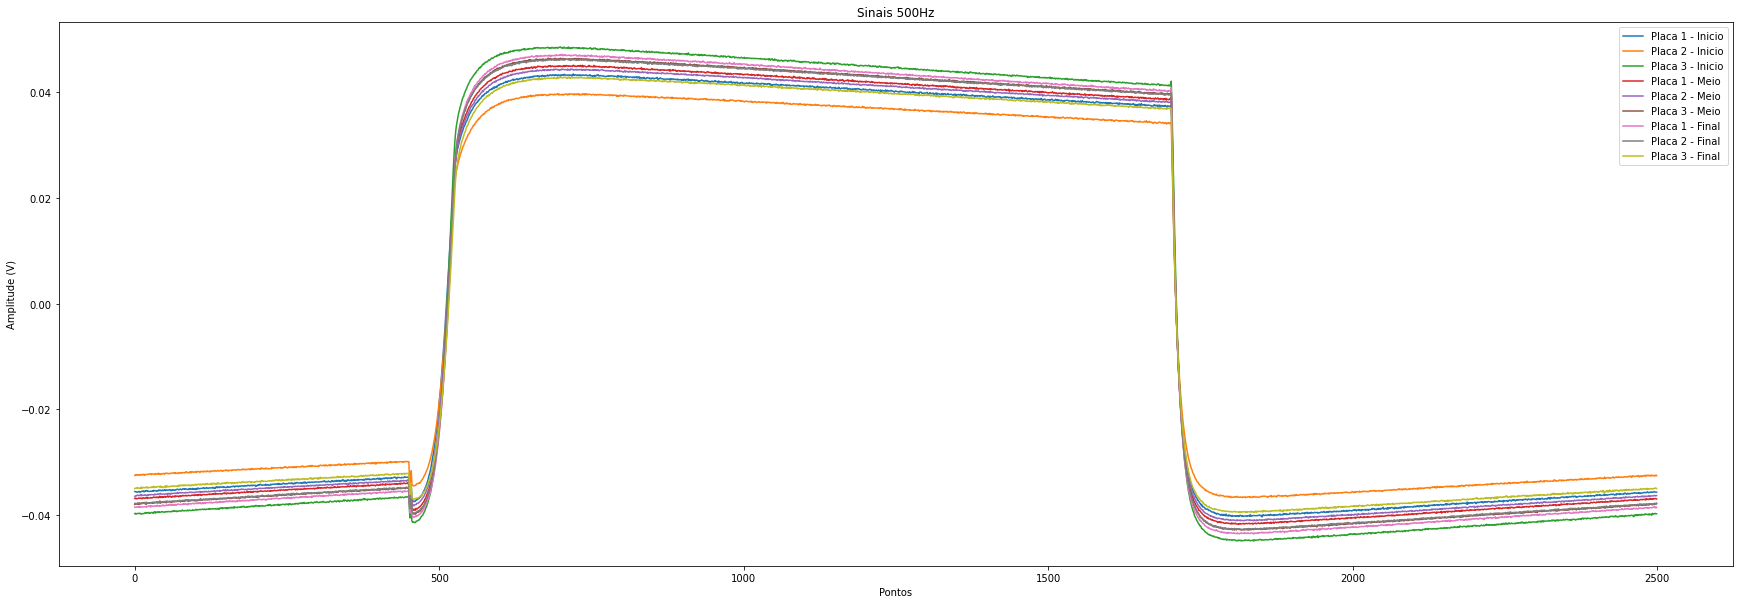

In [10]:
# PLOTANDO A MÉDIA DOS SINAIS DE CADA CONDIÇÃO DE 500Hz, TEMOS O SEGUINTE GRÁFICO:
plt.figure(figsize=(30,10))
plt.plot(sinais_mean_500["1_Inicio"], label='Placa 1 - Inicio')
plt.plot(sinais_mean_500["2_Inicio"], label='Placa 2 - Inicio')
plt.plot(sinais_mean_500["3_Inicio"], label='Placa 3 - Inicio')
plt.plot(sinais_mean_500["1_Meio"], label='Placa 1 - Meio')
plt.plot(sinais_mean_500["2_Meio"], label='Placa 2 - Meio')
plt.plot(sinais_mean_500["3_Meio"], label='Placa 3 - Meio')
plt.plot(sinais_mean_500["1_Final"], label='Placa 1 - Final')
plt.plot(sinais_mean_500["2_Final"], label='Placa 2 - Final')
plt.plot(sinais_mean_500["3_Final"], label='Placa 3 - Final')
plt.legend(loc="upper right")
plt.title('Sinais 500Hz') 
plt.xlabel('Pontos')
#plt.xlim(2100, 2300)
plt.ylabel('Amplitude (V)')
plt.show()

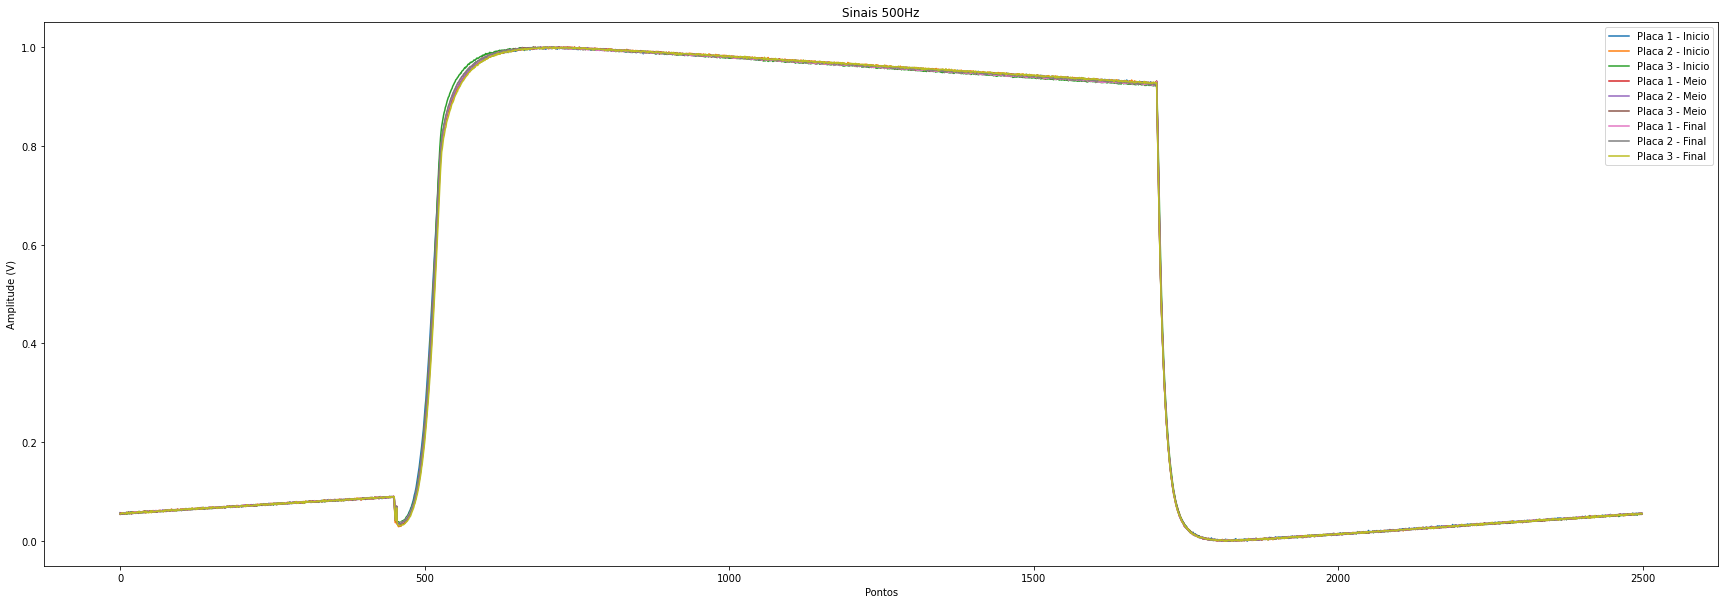

In [11]:
# PARA OS SINAIS NORMALIZADOS ENTRE 0 E 1 (INDIVIDUALEMNTE)

sinais_mean_500_norm = pd.DataFrame()

sinais_mean_500_norm=(sinais_mean_500-sinais_mean_500.min())/(sinais_mean_500.max()-sinais_mean_500.min())

plt.figure(figsize=(30,10))
plt.plot(sinais_mean_500_norm["1_Inicio"], label='Placa 1 - Inicio')
plt.plot(sinais_mean_500_norm["2_Inicio"], label='Placa 2 - Inicio')
plt.plot(sinais_mean_500_norm["3_Inicio"], label='Placa 3 - Inicio')
plt.plot(sinais_mean_500_norm["1_Meio"], label='Placa 1 - Meio')
plt.plot(sinais_mean_500_norm["2_Meio"], label='Placa 2 - Meio')
plt.plot(sinais_mean_500_norm["3_Meio"], label='Placa 3 - Meio')
plt.plot(sinais_mean_500_norm["1_Final"], label='Placa 1 - Final')
plt.plot(sinais_mean_500_norm["2_Final"], label='Placa 2 - Final')
plt.plot(sinais_mean_500_norm["3_Final"], label='Placa 3 - Final')
plt.legend(loc="upper right")
plt.title('Sinais 500Hz') 
plt.xlabel('Pontos')
#plt.xlim(2100, 2300)
plt.ylabel('Amplitude (V)')
plt.show()

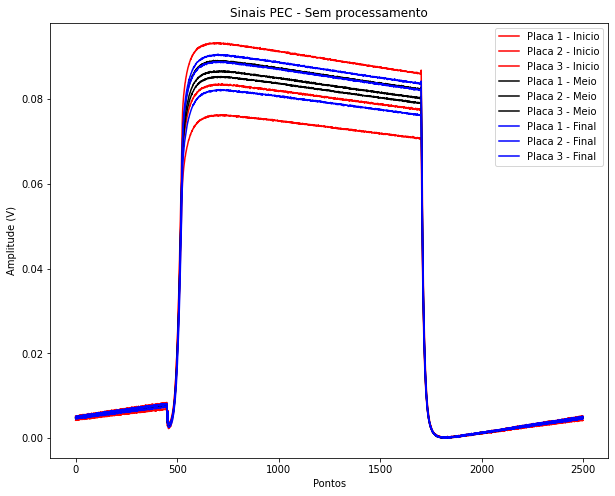

In [12]:
# ESTABELECENDO UM PONTO EQUIVALENTE (MÍNIMO)

sinais_mean_500_norm2 = pd.DataFrame()

sinais_mean_500_norm2["1_Inicio"] = (sinais_mean_500["1_Inicio"]-abs(sinais_mean_500["1_Inicio"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())
sinais_mean_500_norm2["2_Inicio"] = (sinais_mean_500["2_Inicio"]-abs(sinais_mean_500["2_Inicio"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())
sinais_mean_500_norm2["3_Inicio"] = (sinais_mean_500["3_Inicio"]-abs(sinais_mean_500["3_Inicio"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())

sinais_mean_500_norm2["1_Meio"] = (sinais_mean_500["1_Meio"]-abs(sinais_mean_500["1_Meio"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())
sinais_mean_500_norm2["2_Meio"] = (sinais_mean_500["2_Meio"]-abs(sinais_mean_500["2_Meio"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())
sinais_mean_500_norm2["3_Meio"] = (sinais_mean_500["3_Meio"]-abs(sinais_mean_500["3_Meio"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())

sinais_mean_500_norm2["1_Final"] = (sinais_mean_500["1_Final"]-abs(sinais_mean_500["1_Final"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())
sinais_mean_500_norm2["2_Final"] = (sinais_mean_500["2_Final"]-abs(sinais_mean_500["2_Final"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())
sinais_mean_500_norm2["3_Final"] = (sinais_mean_500["3_Final"]-abs(sinais_mean_500["3_Final"].min()-sinais_mean_500.min().min()))+abs(0-sinais_mean_500.min().min())

plt.figure(figsize=(10,8))
plt.plot(sinais_mean_500_norm2["1_Inicio"],'r-', label='Placa 1 - Inicio',  linewidth=1.5)
plt.plot(sinais_mean_500_norm2["2_Inicio"],'r-', label='Placa 2 - Inicio',  linewidth=1.5)
plt.plot(sinais_mean_500_norm2["3_Inicio"],'r-', label='Placa 3 - Inicio',   linewidth=1.5)
plt.plot(sinais_mean_500_norm2["1_Meio"],'k-', label='Placa 1 - Meio',  linewidth=1.5)
plt.plot(sinais_mean_500_norm2["2_Meio"],'k-', label='Placa 2 - Meio',  linewidth=1.5)
plt.plot(sinais_mean_500_norm2["3_Meio"],'k-', label='Placa 3 - Meio', linewidth=1.5)
plt.plot(sinais_mean_500_norm2["1_Final"],'b-', label='Placa 1 - Final', linewidth=1.5)
plt.plot(sinais_mean_500_norm2["2_Final"],'b-', label='Placa 2 - Final',  linewidth=1.5)
plt.plot(sinais_mean_500_norm2["3_Final"],'b-', label='Placa 3 - Final', linewidth=1.5)
plt.legend(loc="upper right")
plt.title('Sinais PEC - Sem processamento') 
plt.xlabel('Pontos')
plt.ylabel('Amplitude (V)')
plt.show()


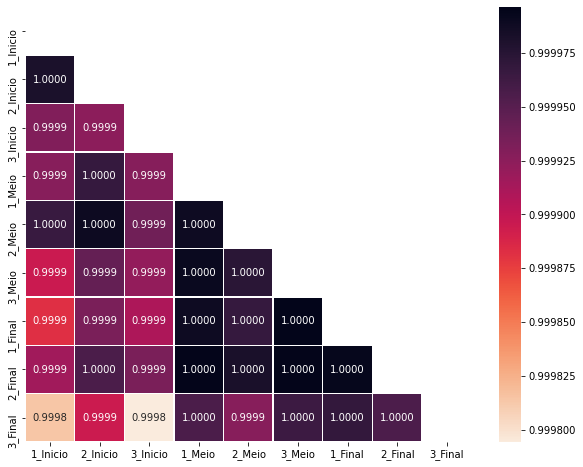

In [13]:
# IMPRIMINDO A MATRIZ CORRELAÇÃO DOS SINAIS DE 500Hz, TEMOS O SEGUINTE RESULTADO:
corr_500 = sinais_mean_500_norm2.corr() 

cmap = sn.cm.rocket_r
pl.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_500, dtype=np.bool))
sn.heatmap(corr_500, annot=True, mask=mask, cmap=cmap, linewidths=.5 ,fmt='.4f')
plt.show()

In [14]:
#GERANDO OS VETORES DOS SINAIS "CRUS" PARA AS REDES NEURAIS
Inicio_500 = pd.concat([Inicio_1_500, Inicio_2_500, Inicio_3_500],  axis=1)
Meio_500 = pd.concat([Meio_1_500, Meio_2_500, Meio_3_500],  axis=1)
Final_500 = pd.concat([Final_1_500, Final_2_500, Final_3_500],  axis=1)


Inicio_500.columns = range(Inicio_500.shape[1])
Meio_500.columns = range(Meio_500.shape[1])
Final_500.columns = range(Final_500.shape[1])

dataset = pd.concat([Inicio_500, Meio_500, Final_500], axis=1)
dataset = dataset.T.reset_index(drop=True).T
#dataset = dataset.transpose().reset_index(drop=True)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458
0,-0.0328,-0.0360,-0.0336,-0.0320,-0.0352,-0.0352,-0.0360,-0.0360,-0.0400,-0.0368,-0.0376,-0.0376,-0.0368,-0.0360,-0.0360,-0.0352,-0.0368,-0.0344,-0.0352,-0.0352,-0.0328,-0.0352,-0.0368,-0.0360,-0.0352,-0.0360,-0.0352,-0.0368,-0.0344,-0.0320,-0.0352,-0.0360,-0.0344,-0.0360,-0.0360,-0.0344,-0.0344,-0.0368,-0.0352,-0.0360,...,-0.0336,-0.0360,-0.0360,-0.0320,-0.0352,-0.0336,-0.0376,-0.0400,-0.0368,-0.0352,-0.0360,-0.0328,-0.0328,-0.0336,-0.0360,-0.0336,-0.0328,-0.0352,-0.0352,-0.0336,-0.0360,-0.0368,-0.0336,-0.0344,-0.0336,-0.0352,-0.0328,-0.0352,-0.0368,-0.0392,-0.0360,-0.0352,-0.0336,-0.0312,-0.0344,-0.0336,-0.0344,-0.0384,-0.0352,-0.0336
1,-0.0328,-0.0352,-0.0336,-0.0336,-0.0352,-0.0344,-0.0360,-0.0352,-0.0392,-0.0368,-0.0360,-0.0368,-0.0368,-0.0360,-0.0360,-0.0352,-0.0376,-0.0352,-0.0360,-0.0344,-0.0352,-0.0352,-0.0360,-0.0352,-0.0360,-0.0352,-0.0352,-0.0360,-0.0344,-0.0328,-0.0352,-0.0360,-0.0360,-0.0352,-0.0352,-0.0336,-0.0344,-0.0360,-0.0360,-0.0376,...,-0.0328,-0.0360,-0.0360,-0.0328,-0.0352,-0.0344,-0.0376,-0.0392,-0.0360,-0.0344,-0.0360,-0.0320,-0.0328,-0.0336,-0.0360,-0.0336,-0.0328,-0.0344,-0.0352,-0.0336,-0.0376,-0.0360,-0.0328,-0.0336,-0.0336,-0.0352,-0.0328,-0.0344,-0.0368,-0.0384,-0.0360,-0.0360,-0.0336,-0.0320,-0.0352,-0.0344,-0.0344,-0.0384,-0.0344,-0.0344
2,-0.0320,-0.0352,-0.0344,-0.0336,-0.0352,-0.0352,-0.0360,-0.0360,-0.0392,-0.0368,-0.0360,-0.0376,-0.0368,-0.0360,-0.0360,-0.0360,-0.0368,-0.0352,-0.0344,-0.0352,-0.0360,-0.0360,-0.0368,-0.0352,-0.0360,-0.0352,-0.0352,-0.0360,-0.0344,-0.0328,-0.0352,-0.0352,-0.0360,-0.0360,-0.0360,-0.0344,-0.0344,-0.0368,-0.0344,-0.0368,...,-0.0328,-0.0352,-0.0368,-0.0320,-0.0360,-0.0352,-0.0368,-0.0400,-0.0368,-0.0360,-0.0360,-0.0304,-0.0328,-0.0336,-0.0352,-0.0336,-0.0320,-0.0352,-0.0352,-0.0328,-0.0376,-0.0376,-0.0336,-0.0336,-0.0336,-0.0352,-0.0328,-0.0344,-0.0352,-0.0392,-0.0360,-0.0360,-0.0336,-0.0320,-0.0344,-0.0344,-0.0344,-0.0376,-0.0344,-0.0344
3,-0.0336,-0.0352,-0.0336,-0.0336,-0.0352,-0.0344,-0.0352,-0.0368,-0.0392,-0.0368,-0.0360,-0.0368,-0.0368,-0.0352,-0.0360,-0.0352,-0.0368,-0.0352,-0.0360,-0.0352,-0.0360,-0.0352,-0.0368,-0.0360,-0.0360,-0.0344,-0.0360,-0.0368,-0.0352,-0.0328,-0.0352,-0.0368,-0.0352,-0.0368,-0.0360,-0.0336,-0.0344,-0.0368,-0.0352,-0.0368,...,-0.0328,-0.0360,-0.0360,-0.0320,-0.0352,-0.0336,-0.0376,-0.0400,-0.0368,-0.0352,-0.0360,-0.0320,-0.0328,-0.0328,-0.0360,-0.0336,-0.0328,-0.0344,-0.0352,-0.0336,-0.0376,-0.0360,-0.0328,-0.0344,-0.0328,-0.0352,-0.0328,-0.0352,-0.0368,-0.0400,-0.0376,-0.0352,-0.0336,-0.0320,-0.0336,-0.0336,-0.0344,-0.0384,-0.0336,-0.0344
4,-0.0336,-0.0352,-0.0336,-0.0328,-0.0352,-0.0344,-0.0360,-0.0368,-0.0392,-0.0368,-0.0352,-0.0368,-0.0376,-0.0368,-0.0360,-0.0360,-0.0376,-0.0352,-0.0360,-0.0344,-0.0352,-0.0360,-0.0360,-0.0360,-0.0352,-0.0344,-0.0352,-0.0360,-0.0336,-0.0328,-0.0352,-0.0376,-0.0360,-0.0360,-0.0352,-0.0344,-0.0352,-0.0360,-0.0352,-0.0360,...,-0.0320,-0.0352,-0.0360,-0.0320,-0.0360,-0.0344,-0.0376,-0.0392,-0.0360,-0.0344,-0.0352,-0.0320,-0.0328,-0.0328,-0.0344,-0.0344,-0.0320,-0.0352,-0.0352,-0.0336,-0.0376,-0.0360,-0.0320,-0.0344,-0.0336,-0.0352,-0.0328,-0.0344,-0.0360,-0.0384,-0.0344,-0.0352,-0.0336,-0.0320,-0.0344,-0.0336,-0.0352,-0.0384,-0.0352,-0.0344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.0320,-0.0352,-0.0344,-0.0328,-0.0360,-0.0344,-0.0360,-0.0360,-0.0400,-0.0368,-0.0368,-0.0376,-0.0376,-0.0368,-0.0376,-0.0360,-0.0360,-0.0352,-0.0352,-0.0352,-0

In [15]:
#GERANDO OS VETORES DOS SINAIS "CRUS" PARA AS REDES NEURAIS - ESTABELECENDO UM MESMO PONTO MÍNIMO PARA TODOS OS SINAIS
dataset_norm =(dataset-abs(dataset.min()-dataset.min().min()))+abs(0-dataset.min().min()) 

#plt.figure(figsize=(30,10))
#plt.plot(dataset_norm)
#plt.show()

# AMPLITUDE E SINAIS EXPONENCIAIS

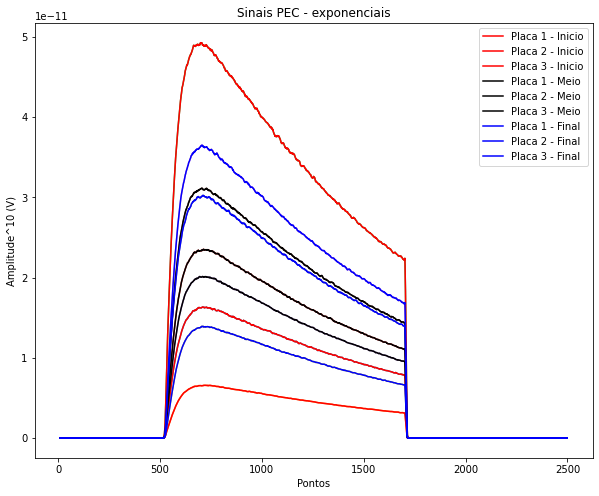

In [16]:
# MULTIPLICANDO TODAS AS CURVAS POR UMA MESMA FUNÇÃO (EXPONENCIAL), TEMOS O OBJETIVO DE VERIFICAR A AMPLITUDE E SE HÁ DIFERENÇAS NA ANÁLISE DE DADOS

i = 10 # QTDE DE UTILIZADOS UTILIZADOS PARA REALIZAR A MÉDIA MÓVEL
exp = 10 # EXPONENCIAL (FATOR COMUM)

sinais_mean_500_exp = sinais_mean_500_norm2.pow(exp).rolling(i).mean() #UTILIZANDO O DF COM A MÉDIA DOS SINAIS, MULTIPLICAMOS POR UM FATOR COMUM (EXPONENCIAL) E REALIZAMOS A MÉDIA MÓVEL (SMOOTH)

plt.figure(figsize=(10,8))
plt.plot(sinais_mean_500_exp)
plt.plot(sinais_mean_500_exp["1_Inicio"], 'r-', label='Placa 1 - Inicio',linewidth=1.5)
plt.plot(sinais_mean_500_exp["2_Inicio"], 'r-', label='Placa 2 - Inicio',linewidth=1.5)
plt.plot(sinais_mean_500_exp["3_Inicio"], 'r-', label='Placa 3 - Inicio',linewidth=1.5)
plt.plot(sinais_mean_500_exp["1_Meio"], 'k-', label='Placa 1 - Meio',linewidth=1.5)
plt.plot(sinais_mean_500_exp["2_Meio"], 'k-', label='Placa 2 - Meio',linewidth=1.5)
plt.plot(sinais_mean_500_exp["3_Meio"], 'k-', label='Placa 3 - Meio',linewidth=1.5)
plt.plot(sinais_mean_500_exp["1_Final"], 'b-', label='Placa 1 - Final',linewidth=1.5)
plt.plot(sinais_mean_500_exp["2_Final"],'b-', label='Placa 2 - Final',linewidth=1.5)
plt.plot(sinais_mean_500_exp["3_Final"],'b-', label='Placa 3 - Final',linewidth=1.5)
plt.legend(loc="upper right")
plt.title('Sinais PEC - exponenciais') 
plt.xlabel('Pontos')
plt.ylabel('Amplitude^10 (V)')
plt.show()

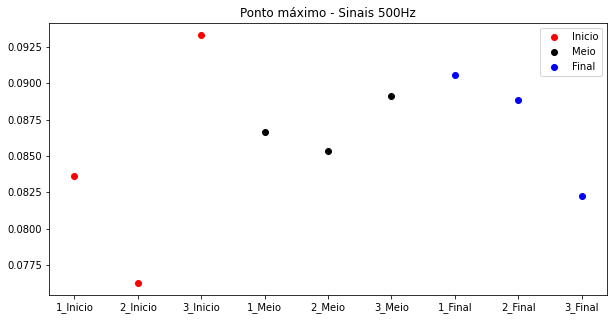

In [17]:
#PLOTANDO O VALOR MÁXIMO DAS MÉDIAS DOS SINAIS (500Hz)
max_500 = sinais_mean_500_norm2.max()

plt.figure(figsize=(10,5))

plt.plot(max_500[0:1],'ro', Label='Inicio')
plt.plot(max_500[1:2],'ro')
plt.plot(max_500[2:3],'ro')

plt.plot(max_500[3:4],'ko', Label='Meio')
plt.plot(max_500[4:5],'ko')
plt.plot(max_500[5:6],'ko')

plt.plot(max_500[6:7],'bo', Label='Final')
plt.plot(max_500[7:8],'bo')
plt.plot(max_500[8:9],'bo')
plt.title('Ponto máximo - Sinais 500Hz') 
plt.legend()
plt.show()

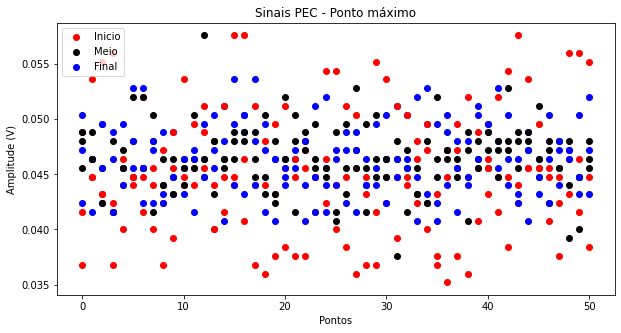

In [18]:
#PLOTANDO O VALOR MÁXIMO DE TODOS OS SINAIS (500Hz)
plt.figure(figsize=(10,5))
plt.plot(Inicio_1_500.max(), 'ro', label='Inicio')
plt.plot(Meio_1_500.max(), 'ko', label='Meio')
plt.plot(Final_1_500.max(), 'bo', label='Final')

plt.plot(Inicio_2_500.max(), 'ro')
plt.plot(Meio_2_500.max(), 'ko')
plt.plot(Final_2_500.max(), 'bo')

plt.plot(Inicio_3_500.max(), 'ro')
plt.plot(Meio_3_500.max(), 'ko')
plt.plot(Final_3_500.max(), 'bo')
plt.legend()
plt.title('Sinais PEC - Ponto máximo') 
plt.xlabel('Pontos')
plt.ylabel('Amplitude (V)')
plt.show()

#PLOTANDO O VALOR MÁXIMO DE TODOS OS SINAIS (500Hz)
#plt.figure(figsize=(10,5))
#plt.plot(Inicio_1_500.pow(100).rolling(20).mean().max(), 'ro', label='Inicio')
#plt.plot(Meio_1_500.pow(100).rolling(20).mean().max(), 'ko', label='Meio')
#plt.plot(Final_1_500.pow(100).rolling(20).mean().max(), 'bo', label='Final')

#plt.plot(Inicio_2_500.pow(100).rolling(20).mean().max(), 'ro')
#plt.plot(Meio_2_500.pow(100).rolling(20).mean().max(), 'ko')
#plt.plot(Final_2_500.pow(100).rolling(20).mean().max(), 'bo')

#plt.plot(Inicio_3_500.pow(100).rolling(20).mean().max(), 'ro')
#plt.plot(Meio_3_500.pow(100).rolling(20).mean().max(), 'ko')
#plt.plot(Final_3_500.pow(100).rolling(20).mean().max(), 'bo')
#plt.legend()
#plt.show()

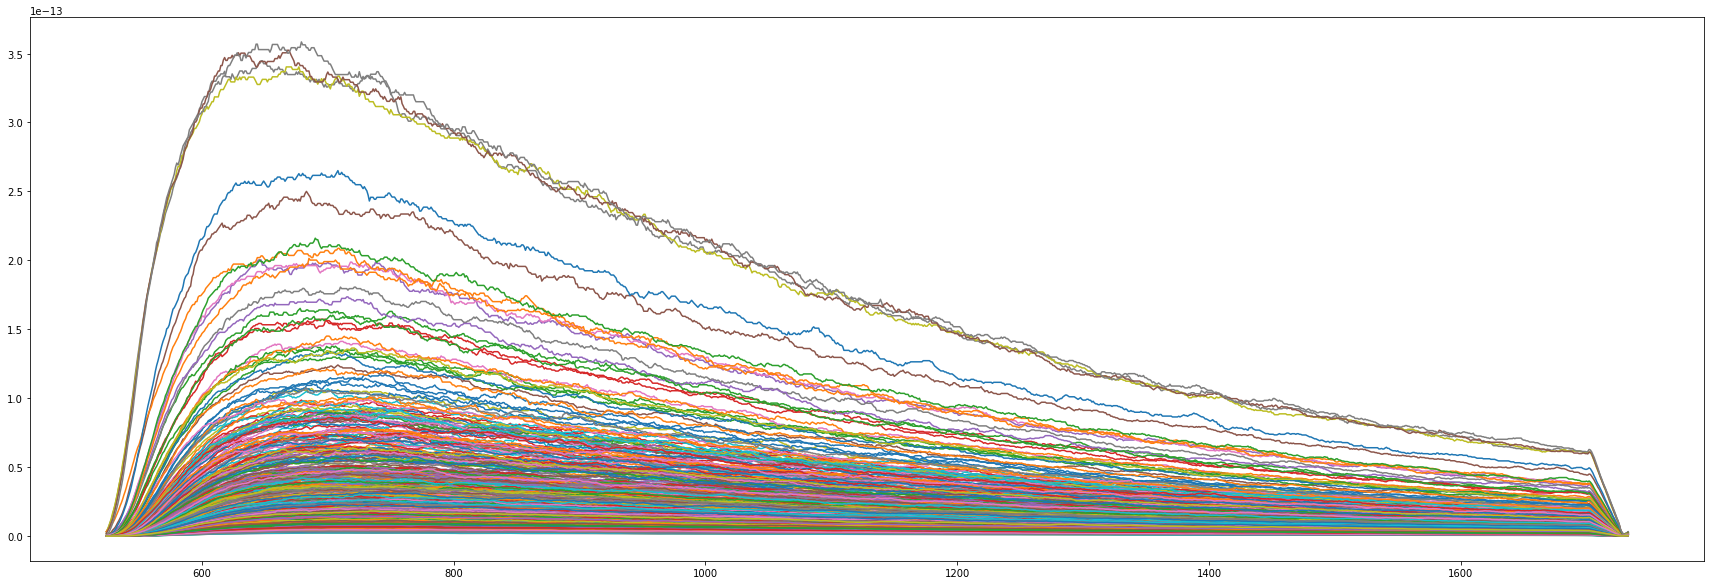

In [19]:
#GERANDO OS VETORES DOS SINAIS PARA AS REDES NEURAIS - ESTABELECENDO UM MESMO PONTO MÍNIMO PARA TODOS OS SINAIS
i = 25 # QTDE DE UTILIZADOS UTILIZADOS PARA REALIZAR A MÉDIA MÓVEL
exp = 10 # EXPONENCIAL (FATOR COMUM)
dataset_exp = dataset.pow(exp).rolling(i).mean().dropna()

dataset_exp = dataset_exp.iloc[500:1710, :]

plt.figure(figsize=(30,10))
plt.plot(dataset_exp)
plt.show()

# DFT


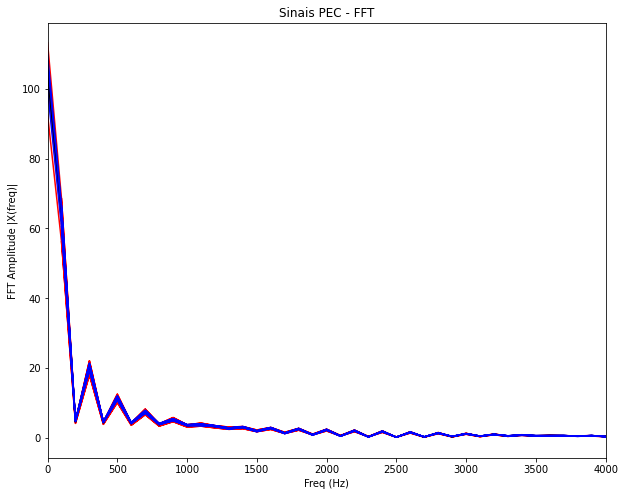

In [20]:
#FFT DOS SINAIS - 500hz

yf_500 = pd.DataFrame()

#T = 1/500000 #Sample time
T = 4E-6 #Sample time

N_500 = len(sinais_mean_500_norm2.index) # TAMANHO DO SINAL
#T = 1.0/100000 # inverse of sampling rate

x_500 = np.linspace(0.0, N_500*T, N_500) # EIXO X = VETOR DE DURAÇÃO DO SINAL (TEMPO) 
#y_100[0] = sinais_mean_100["1_Inicio"].values
yf_500["1_Inicio"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["1_Inicio"].values))
yf_500["2_Inicio"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["2_Inicio"].values))
yf_500["3_Inicio"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["3_Inicio"].values))
yf_500["1_Meio"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["1_Meio"].values))
yf_500["2_Meio"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["2_Meio"].values))
yf_500["3_Meio"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["3_Meio"].values))
yf_500["1_Final"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["1_Final"].values))
yf_500["2_Final"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["2_Final"].values))
yf_500["3_Final"] = np.abs(scipy.fft.fft(sinais_mean_500_norm2["3_Final"].values))
xf_500 = scipy.fftpack.fftfreq(sinais_mean_500_norm2["1_Inicio"].size, d=T)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.abs(xf_500),np.abs(yf_500["1_Inicio"]),'r-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["2_Inicio"]),'r-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["3_Inicio"]),'r-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["1_Meio"]),'k-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["2_Meio"]),'k-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["3_Meio"]),'k-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["1_Final"]),'b-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["2_Final"]),'b-',linewidth=1.5)
ax.plot(np.abs(xf_500),np.abs(yf_500["3_Final"]),'b-',linewidth=1.5)
plt.xlim(0, 4000)
plt.title('Sinais PEC - FFT') 
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

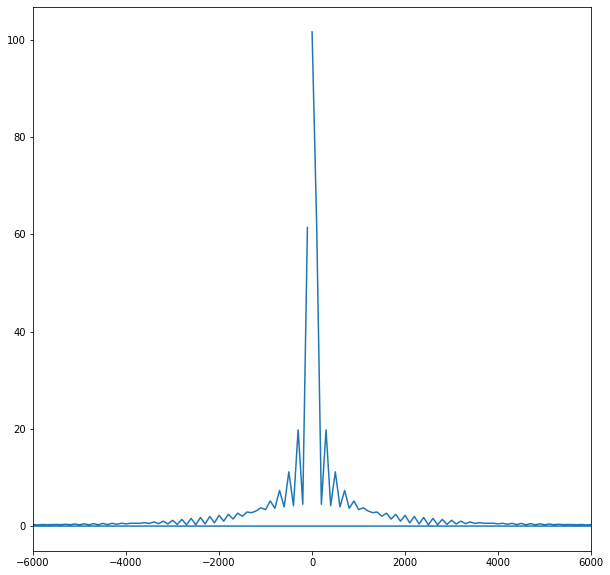

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((xf_500),(yf_500["1_Inicio"]))

plt.xlim(-6000, 6000)
plt.show()

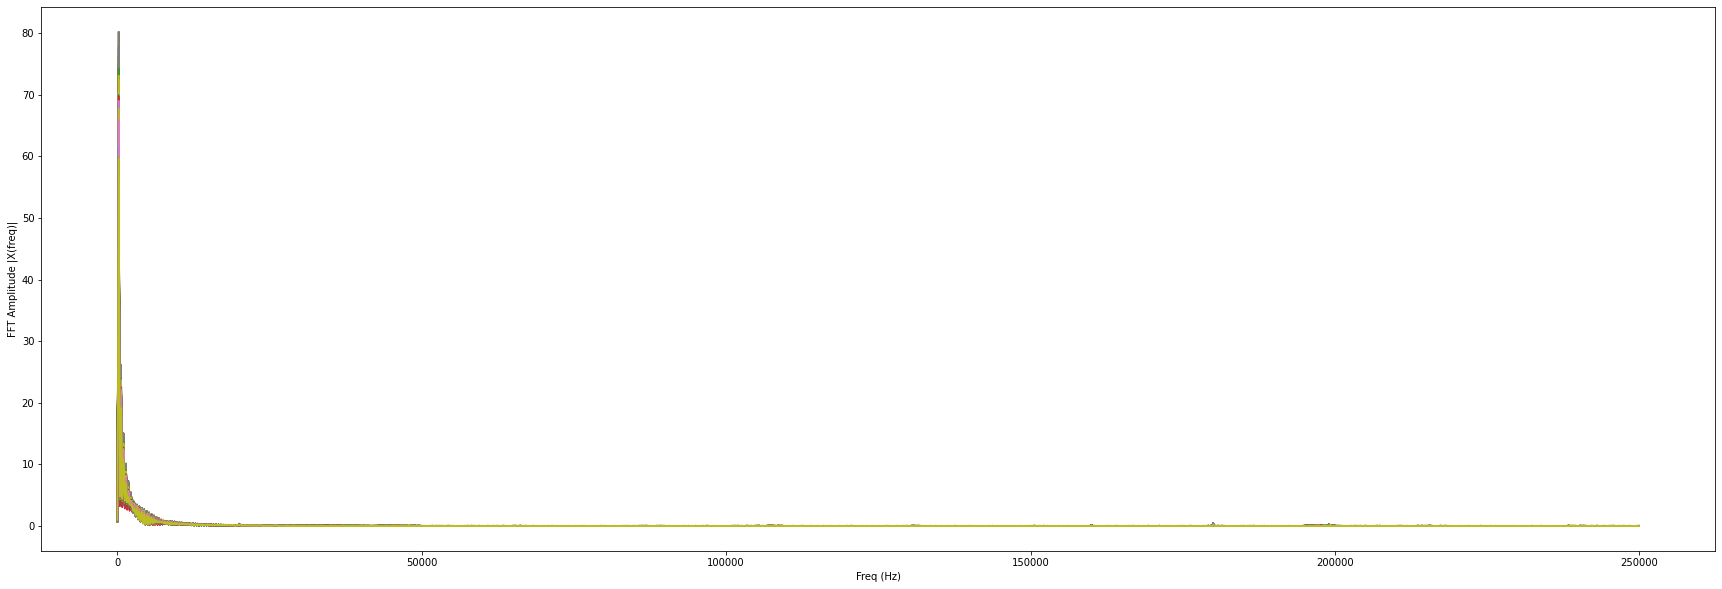

In [22]:
#GERANDO OS VETORES DOS SINAIS PARA AS REDES NEURAIS - ESTABELECENDO UM MESMO PONTO MÍNIMO PARA TODOS OS SINAIS
yf_500_dataset=dataset

T = 1/500000 #Sample time
N_500_dataset = len(dataset.index)

x_500_dataset = np.linspace(0.0, N_500_dataset*T, N_500_dataset) # EIXO X = VETOR DE DURAÇÃO DO SINAL (TEMPO) 

for column in yf_500_dataset:
#  yf_500_dataset[column] = np.abs(scipy.fft.fft(dataset[column].values))
  yf_500_dataset[column] = np.abs(scipy.fft.fft(dataset[column].values))
  xf_500_dataset = scipy.fftpack.fftfreq(dataset[column].size, d=T)

fig, ax = plt.subplots(figsize=(30,10))
for column in yf_500_dataset:
  ax.plot(np.abs(xf_500_dataset),np.abs(yf_500_dataset[column]))

plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()
plt.show()

In [23]:
dataset_fft = yf_500_dataset.iloc[0:1249, :]
#plt.plot(dataset_fft)

In [24]:
# determining the name of the file
#file_name = 'Sinais_FFT.xlsx'
#file_name2 = 'Target.xlsx'
  
# saving the excel
#dataset_fft.to_excel(file_name)
#target.to_excel(file_name2)

# PCA

In [ ]:
# PCA COM DADOS PADRONIZADOS -----------------------------------------------------------------------------------
dataset_norm_PCA_stan = StandardScaler().fit_transform(dataset_norm.transpose())
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_norm_PCA_stan)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
final_dataset_norm_PCA_stan = pd.concat([principalDf, target], axis = 1)
final_dataset_norm_PCA_stan.columns = ['principal component 1', 'principal component 2', 'target']

# PCA COM DADOS NÃO PADRONIZADOS -----------------------------------------------------------------------------------

dataset_norm_PCA = dataset_norm.transpose()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_norm_PCA)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
final_dataset_norm_PCA = pd.concat([principalDf, target], axis = 1)
final_dataset_norm_PCA.columns = ['principal component 1', 'principal component 2', 'target']

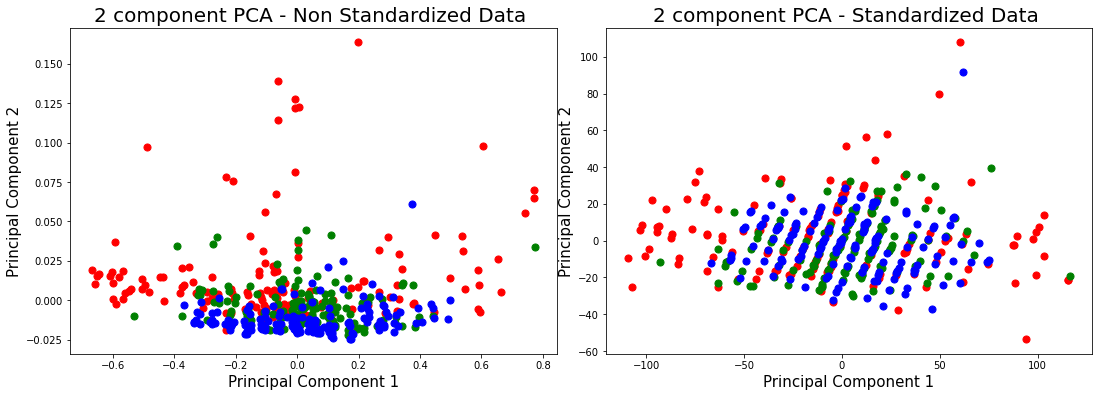

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#fig = plt.figure(figsize = (8,8))
#ax[0] = fig.add_subplot(1,1,1) 
ax[0].set_xlabel('Principal Component 1', fontsize = 15)
ax[0].set_ylabel('Principal Component 2', fontsize = 15)
ax[0].set_title('2 component PCA - Non Standardized Data ', fontsize = 20)
targets = ['Inicio', 'Meio', 'Final']
colors = ['r', 'g', 'b']
for target_graph, color in zip(targets,colors):
    indicesToKeep = final_dataset_norm_PCA['target'] == target_graph
    ax[0].scatter(final_dataset_norm_PCA.loc[indicesToKeep, 'principal component 1']
               , final_dataset_norm_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)


ax[1].set_xlabel('Principal Component 1', fontsize = 15)
ax[1].set_ylabel('Principal Component 2', fontsize = 15)
ax[1].set_title('2 component PCA - Standardized Data ', fontsize = 20)
targets = ['Inicio', 'Meio', 'Final']
colors = ['r', 'g', 'b']
for target_graph2, color in zip(targets,colors):
    indicesToKeep = final_dataset_norm_PCA_stan['target'] == target_graph2
    ax[1].scatter(final_dataset_norm_PCA_stan.loc[indicesToKeep, 'principal component 1']
               , final_dataset_norm_PCA_stan.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

In [30]:
# FUNCTIONAL PCA -----------------------------------------------------------------------
from fdasrsf import fPCA, time_warping, fdawarp, fdahpca

# Convert the Pandas dataframe to a Numpy array with time-series only
f = sinais_mean_500.to_numpy().astype(float)
# Create a float vector between 0 and 1 for time index
time = np.linspace(0,1,len(f))


In [33]:
warp_f = time_warping.fdawarp(f, time)

In [34]:
warp_f.srsf_align()

Initializing...
Compute Karcher Mean of 9 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


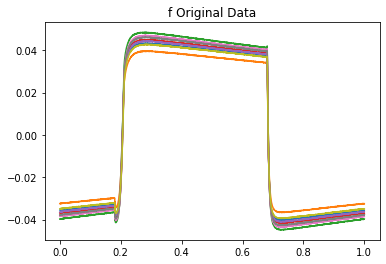

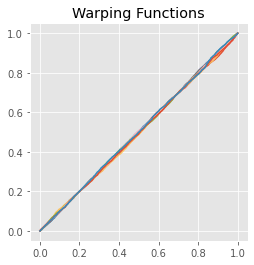

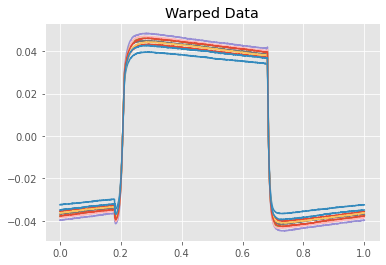

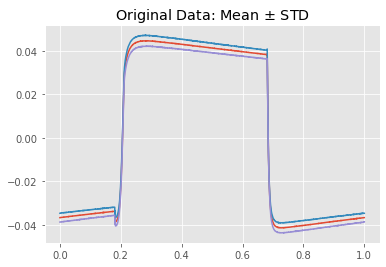

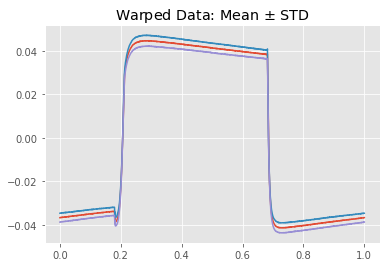

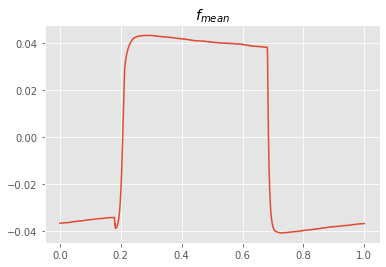

In [35]:
warp_f.plot()

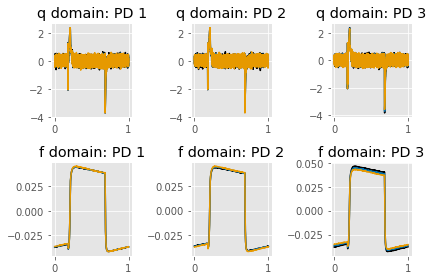

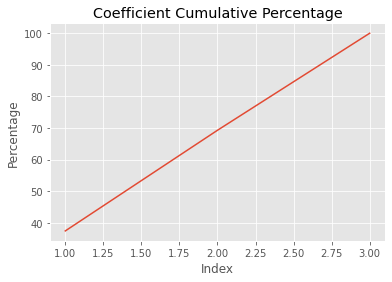

In [37]:
# Define the FPCA as a vertical analysis
fPCA_analysis = fPCA.fdavpca(warp_f)

# Run the FPCA on a 3 components basis 
fPCA_analysis.calc_fpca(no=3)
fPCA_analysis.plot()

In [38]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,0], mode='lines', name="PC1"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,1], mode='lines', name="PC2"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,2], mode='lines', name="PC3"))

fig.update_layout(
    title_text='<b>Principal Components Analysis Functions</b>', title_x=0.5,
)

fig.show()

In [39]:
fPCA_coef = fPCA_analysis.coef
fPCA_coef

array([[ 7.938221  ,  0.29694739,  2.72708332],
       [-0.94325999,  0.80071254,  2.63177684],
       [-0.64439334,  1.83187451, -1.37434435],
       [-0.98646763,  2.0037673 ,  4.78310656],
       [ 1.50448935, -2.19228126,  0.15111026],
       [-2.5139772 ,  5.71617473, -1.96821017],
       [ 1.91077302, -4.97726344, -4.13068303],
       [-0.30199782,  1.40989794, -5.1986098 ],
       [-5.9633874 , -4.88982972,  2.37877037]])

In [42]:
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:,0], y=fPCA_coef[:,1], mode='markers+text', text=sinais_mean_500.columns))

fig.update_traces(textposition='top center')

fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    title_text='<b>Function Principal Components Analysis</b>', title_x=0.5,
    xaxis_title="PC1",
    yaxis_title="PC2",
)
fig.show()



# SSA

# SVM

In [ ]:
#X = dataset_norm.transpose().to_numpy()     #SINAIS NORMALIZADOS
#X = dataset_exp.transpose().to_numpy()      #SINAIS EXPONENCIAIS
X = dataset_fft.transpose().to_numpy()       #SINAIS FFT
y = target.to_numpy()
y = y.reshape(459, )
#y = target.transpose().to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In [ ]:
linear = svm.SVC(kernel='linear', C=100000, decision_function_shape='ovo').fit(X_train, y_train)

rbf = svm.SVC(kernel='rbf', gamma=1, C=100000, decision_function_shape='ovo').fit(X_train, y_train)

poly = svm.SVC(kernel='poly', degree=3, C=100000, decision_function_shape='ovo').fit(X_train, y_train)

sig = svm.SVC(kernel='sigmoid', C=100000, decision_function_shape='ovo').fit(X_train, y_train)

#stepsize in the mesh, it alters the accuracy of the plotprint -----------------------------------------------------


#to better understand it, just play with the value, change it and print it
h = .01


linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)


# retrieve the accuracy and print it for all 4 kernel functions ----------------------------------------------------------------
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.7282608695652174
Accuracy Polynomial Kernel: 0.7608695652173914
Accuracy Radial Basis Kernel: 0.7391304347826086
Accuracy Sigmoid Kernel: 0.358695652173913


Normalized confusion matrix
[[0.78 0.03 0.19]
 [0.11 0.75 0.14]
 [0.22 0.12 0.66]]
Normalized confusion matrix
[[0.78 0.03 0.19]
 [0.11 0.79 0.11]
 [0.19 0.09 0.72]]
Normalized confusion matrix
[[0.75 0.06 0.19]
 [0.07 0.75 0.18]
 [0.22 0.06 0.72]]


<Figure size 1440x720 with 0 Axes>

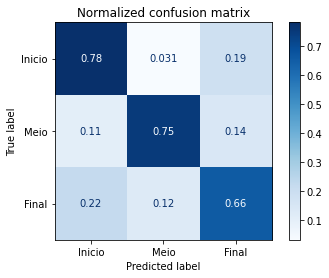

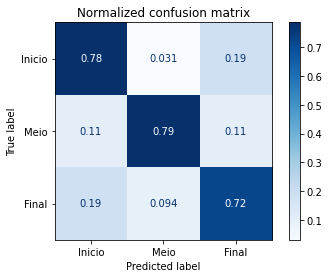

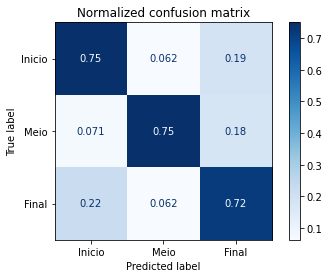

Normalized confusion matrix
[[0.44 0.03 0.53]
 [0.71 0.04 0.25]
 [0.34 0.09 0.56]]


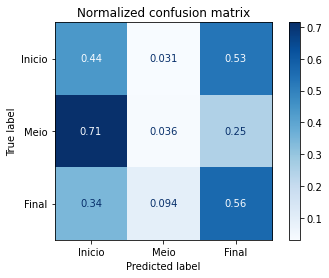

In [ ]:
class_names = ['Inicio','Meio','Final']

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
titles_options = [("Normalized confusion matrix", 'true')]

pl.figure(figsize=(20, 10))
for title, normalize in titles_options:
    disp = plot_confusion_matrix(linear, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    disp = plot_confusion_matrix(poly, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    disp = plot_confusion_matrix(rbf, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.show()

    disp = plot_confusion_matrix(sig, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline